In [1]:
!wget -q --show-progress -O Drivers.zip "https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip?dl=0"

Drivers.zip         100%[===================>]   3.99G  87.7MB/s    in 60s     


In [2]:
!unzip -q Drivers.zip

In [3]:
!rm Drivers.zip

In [4]:
!unzip -q imgs.zip

In [5]:
!rm imgs.zip

In [6]:
import pandas as pd
driver_list=pd.read_csv('/content/driver_imgs_list.csv')

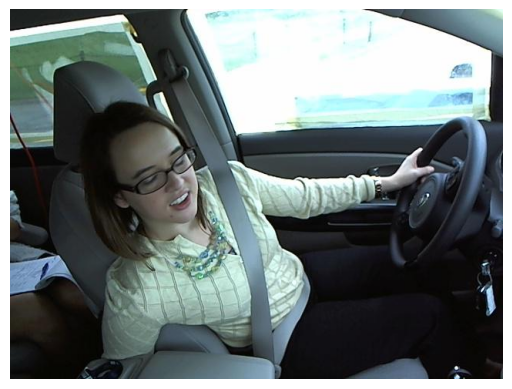

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = '/content/test/img_7669.jpg'
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255., validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [9]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))  # Dropout to reduce overfitting
model.add(Dense(10, activation='softmax'))  # 10 categories

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,193,226 (8.37 MB)

 Trainable params: 2,193,226 (8.37 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
batch_size=32
steps_per_epoch=train_generator.n//batch_size
val_steps=val_generator.n//batch_size


In [13]:
steps_per_epoch,val_steps

(560, 140)

In [14]:
model.fit(
    train_generator,
    #steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    #validation_steps=val_steps,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


561/561 ━━━━━━━━━━━━━━━━━━━━ 55s 89ms/step - accuracy: 0.5488 - loss: 1.2766 - val_accuracy: 0.9609 - val_loss: 0.1284
Epoch 2/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 46s 82ms/step - accuracy: 0.9674 - loss: 0.1043 - val_accuracy: 0.9804 - val_loss: 0.0680
Epoch 3/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 44s 79ms/step - accuracy: 0.9851 - loss: 0.0529 - val_accuracy: 0.9871 - val_loss: 0.0467
Epoch 4/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 45s 81ms/step - accuracy: 0.9885 - loss: 0.0376 - val_accuracy: 0.9906 - val_loss: 0.0306
Epoch 5/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 45s 81ms/step - accuracy: 0.9924 - loss: 0.0236 - val_accuracy: 0.9879 - val_loss: 0.0478
Epoch 6/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 45s 81ms/step - accuracy: 0.9929 - loss: 0.0239 - val_accuracy: 0.9917 - val_loss: 0.0326
Epoch 7/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 46s 83ms/step - accuracy: 0.9950 - loss: 0.0201 - val_accuracy: 0.9913 - val_loss: 0.0415
Epoch 8/10
561/561 ━━━━━━━━━━━━━━━━━━━━ 43s 77ms/step - accuracy: 0.9931 - loss: 0.0213 - val_accurac

In [15]:
import os

In [16]:
test_dir = '/content/test'
test_images = [f for f in os.listdir(test_dir) if f.endswith('.jpg')]  # or .png, etc.
test_df = pd.DataFrame({'filename': test_images})

In [17]:
# 1. Set up test generator (no data augmentation)
test_datagen = ImageDataGenerator(rescale=1./255.)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_dir,
    x_col='filename',
    y_col=None,
    target_size=(64, 64),
    batch_size=32,
    class_mode=None,
    shuffle=False
)


Found 79726 validated image filenames.


In [18]:
label={'c0':'safe driving',
       'c1':'texting - right',
       'c2':'talking on the phone - right',
       'c3':'texting - left',
       'c4':'talking on the phone - left',
       'c5':'operating the radio',
       'c6':'drinking',
       'c7':'reaching behind',
       'c8':'hair and makeup',
       'c9':'talking to passenger'}

In [19]:
import numpy as np

In [20]:
# 2. Predict
predictions = model.predict(test_generator)
predicted_indices = np.argmax(predictions, axis=1)

# 3. Map class indices to original labels (e.g., 'c0', 'c1', ...)
class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}  # Reverse mapping
predicted_labels = [idx_to_class[i] for i in predicted_indices]
readable_labels = [label[class_code] for class_code in predicted_labels]


# 4. Get filenames (relative paths)
filenames = test_generator.filenames

# 5. Optional: Extract just the image names (without folders)
image_names = [os.path.basename(name) for name in filenames]

# 6. Save to CSV
results_df = pd.DataFrame({
    'filename': image_names,
    'predicted_label': predicted_labels,
    'description':readable_labels
    })

results_df.to_csv('test_predictions.csv', index=False)
print("Saved predictions to test_predictions.csv")

2492/2492 ━━━━━━━━━━━━━━━━━━━━ 170s 68ms/step
Saved predictions to test_predictions.csv


In [21]:
test_pred=pd.read_csv('/content/test_predictions.csv')

In [22]:
test_pred.head(5)

,filename,predicted_label,description
0,img_100975.jpg,c0,safe driving
1,img_49458.jpg,c9,talking to passenger
2,img_7669.jpg,c7,reaching behind
3,img_38327.jpg,c6,drinking
4,img_74670.jpg,c5,operating the radio
